In [1]:
# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
# !kill -9 -1

!apt-get update -qq 2>&1 > /dev/null
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse



Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18408 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8.1) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .

In [0]:
# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()

# # Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
# Work around misordering of STREAM and STDIN in Jupyter.
# https://github.com/jupyter/notebook/issues/3159
prompt = !google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
# prompt
vcode = getpass.getpass(prompt[0] + '\n\nEnter verification code: ')
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [4]:
# Create a directory and mount Google Drive using that directory.
!mkdir -p new
!google-drive-ocamlfuse new

print ('Files in Drive:')
!ls new/ #Year\ 3:\ Focus/Summer Internships/Documents

# # Create a file in Drive.
# !echo "This newly created file will appear in your Drive file list." > drive/created.txt

import numpy as np
# X = np.load("new/pred.npy")
# Y_ = np.load("new/target.npy")



Files in Drive:
000009045073-101010016272.pdf
000009045073-105010097054.pdf
101009888218.pdf
101010016272.pdf
105009454758.pdf
105009585929.pdf
105010097054.pdf
118009434025.pdf
1.2 Make-up Work - Huy Nguyen.pdf
1.2 Make-up Work.pdf
2014  Notice of assessment - My Account.pdf
3.2 Pre-class Work.odt
337 Tranquille Road, Kamloops - Financial Statement.pdf
4.1 Make up work - Huy Nguyen.pdf
4.1 Make up work.pdf
541590XXXXXX5646-2016Aug16-2016Sep13.pdf
541590XXXXXX5646-2016Jul14-2016Aug15.pdf
541590XXXXXX5646-2016Jun14-2016Jul13.pdf
541590XXXXXX5646-2016Nov15-2016Dec13.pdf
541590XXXXXX5646-2016Oct14-2016Nov14.pdf
541590XXXXXX5646-2016Sep14-2016Oct13.pdf
541590XXXXXX5646-2017Apr14-2017May15.pdf
541590XXXXXX5646-2017Feb14-2017Mar13.pdf
541590XXXXXX5646-2017Jul14-2017Aug14.pdf
541590XXXXXX5646-2017Jun14-2017Jul13.pdf
541590XXXXXX5646-2017Mar14-2017Apr13.pdf
541590XXXXXX5646-2017Nov15-2017Dec13.pdf
8.2 Make-up Work - Huy Nguyen.pdf
8.2 Make-up Work.pdf
Accept Financial Aid _ Minerva Schools.pdf

1D_Diagonalize_Recursion.ipynb
adam_relu_lr_1e3_decay1e_7_batch_10_weights-improvement-10-0.09975532387333362.hdf5
adam_relu_lr_1e3_decay1e_7_batch_10_weights-improvement-1-0.10018198614753808.hdf5
adam_relu_lr_1e3_decay1e_7_batch_10_weights-improvement-2-0.09975532390978187.hdf5
adam_relu_lr_1e3_decay1e_7_batch_10_weights-improvement-6-0.09975532390774519.hdf5
bang9
Compare_diagonalize_recursion.ipynb
diagonalize
diagonalize_3D_Hamiltonian.py
Diagonalize_Recursion.ipynb
Explore_Omit.ipynb
generate_train_data.py
greenf.py
H.py
my_model.hdf5
NN_predict_omit_error_copy2.ipynb
NN_predict_omit_error_copy.ipynb
NN_predict_omit_error_train.py
Omit_States.ipynb
pred.npy
pred_Y.npy
pred_Y_perm.npy
target.npy
true.npy
true_Y.npy
true_Y_perm.npy
Untitled0.ipynb
weights_files
X_perm.npy
(7973010, 1)


(array([5766955.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 2206055.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

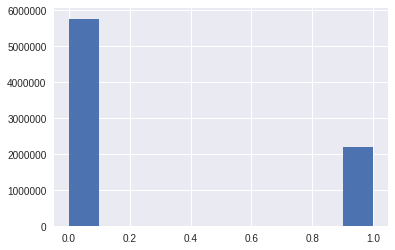

In [5]:
import numpy as np
!ls "new/Year 3: Focus/Summer Internships/Documents"
X = np.load("new/Year 3: Focus/Summer Internships/Documents/X_perm.npy")
true_Y = np.load("new/Year 3: Focus/Summer Internships/Documents/true_Y_perm.npy")
pred_Y = np.load("new/Year 3: Focus/Summer Internships/Documents/pred_Y_perm.npy")
# Y_ = np.load("new/Year 3: Focus/Summer Internships/Documents/target.npy")

import matplotlib.pyplot as plt
%matplotlib inline

target = np.absolute(true_Y - pred_Y) / np.absolute(true_Y) 
print (target.shape)
Y = np.array([target < 1],dtype = int)[0]
plt.hist(Y)

In [6]:

from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, Y_, test_size=0.2, random_state=42)
# print (X_train.shape)
from keras.models import Sequential, load_model
from keras.layers import Dense, BatchNormalization
from keras.wrappers.scikit_learn import KerasRegressor
from keras import regularizers, optimizers
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from keras.callbacks import ModelCheckpoint


# seed = 7
# np.random.seed(seed)




# create model
model = Sequential()
model.add(Dense(200, input_dim=10, kernel_initializer='normal', activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dense(200, kernel_initializer='normal', activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dense(200, kernel_initializer='normal', activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dense(200, kernel_initializer='normal', activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dense(200, kernel_initializer='normal', activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dense(200, kernel_initializer='normal', activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dense(200, kernel_initializer='normal', activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dense(200, kernel_initializer='normal', activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dense(200, kernel_initializer='normal', activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dense(200, kernel_initializer='normal', activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dense(200, kernel_initializer='normal', activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dense(200, kernel_initializer='normal', activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dense(1, kernel_initializer='normal', activation='relu', kernel_regularizer=regularizers.l2(0.001)))
print(model.summary())
  
# Compile model
Adam = optimizers.Adam(lr=0.003, decay=1e-7)
model.compile(loss='binary_crossentropy', optimizer=Adam, metrics = ["acc"])

filepath="new/Year 3: Focus/Summer Internships/Documents/weights_files/sgd_relu_decay1e_8_weights-improvement-{epoch}-{acc}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]




# kfold = KFold(n_splits=2, random_state=seed)
# results = cross_val_score(estimator, X_train, y_train, cv=kfold)
# print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))
# print ("Results", results)
# model = load_model('new/Year 3: Focus/Summer Internships/Documents/weights-improvement-2-1.0170094634986524.hdf5')
# model.fit(X[:400], Y[:400], validation_split=0.2, epochs=50, batch_size=50, callbacks=callbacks_list, verbose=1)
model.fit(X[:400], Y[:400], validation_split=0.2, epochs=1000, batch_size=20, verbose=1)

model.save('new/Year 3: Focus/Summer Internships/Documents/weights_files/my_model.hdf5')

# from google.colab import files
# files.download( 'new/my_model.h5' ) 

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               2200      
_________________________________________________________________
batch_normalization_1 (Batch (None, 200)               800       
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
batch_normalization_2 (Batch (None, 200)               800       
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
batch_normalization_3 (Batch (None, 200)               800       
_________________________________________________________________
dense_4 (Dense)              (None, 200)               40200     
__________

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

model = Sequential()
model.add(Dense(200, input_dim=10, kernel_initializer='normal', activation='relu'))
model.add(BatchNormalization())
for _ in range(10):
    model.add(Dense(200, kernel_initializer='normal', activation='relu'))
    model.add(BatchNormalization())
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
print(model.summary())
    
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(200, input_dim=10, kernel_initializer='normal', activation='relu'))
    model.add(BatchNormalization())
    for _ in range(10):
        model.add(Dense(200, kernel_initializer='normal', activation='relu'))
        model.add(BatchNormalization())
    
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    Adam = optimizers.Adam(lr=0.01, decay=1e-12)
    model.compile(loss='binary_crossentropy', optimizer=Adam, metrics=['accuracy'])
    return model

checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
estimator = KerasClassifier(build_fn=create_baseline, epochs=1, batch_size=160, verbose=1)
# kfold = StratifiedKFold(n_splits=1, shuffle=True)
estimator.fit(X, Y, validation_split=0.2, epochs=10, batch_size=500, callbacks=callbacks_list, verbose=1)
results = cross_val_score(estimator, X, Y)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_110 (Dense)            (None, 200)               2200      
_________________________________________________________________
batch_normalization_101 (Bat (None, 200)               800       
_________________________________________________________________
dense_111 (Dense)            (None, 200)               40200     
_________________________________________________________________
batch_normalization_102 (Bat (None, 200)               800       
_________________________________________________________________
dense_112 (Dense)            (None, 200)               40200     
_________________________________________________________________
batch_normalization_103 (Bat (None, 200)               800       
_________________________________________________________________
dense_113 (Dense)            (None, 200)               40200     
__________